<a href="https://colab.research.google.com/github/LilyMao/Predict-Heart-Disease/blob/main/Decision_Tree__heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

##Import Data

In [66]:
 df=pd.read_csv('processed.cleveland.data',header=None,names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
 df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.shape

(303, 14)

##Missing Data

In [67]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

The missing data is not represented as NA, it is '?'. Need to change all '?'  to np.nan to detect all of them

In [68]:
df.replace('?',np.nan,inplace=True)


In [69]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

I have only a few na in 'ca' and 'thal' column. Displayed below. As 6 missing values is small compared to 300 records, I will drop them

In [70]:
mask=(df['ca'].isna()|df['thal'].isna())
df[mask]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [71]:
df.dropna(inplace=True)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [72]:
y=df['num']
X=df.drop(columns='num')

In [73]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [74]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

only age, threstbps, thalach  and  restecg should be numerical, others are categorical, should transfer from float to dummy variables. 
I do not transfer sex,exang because they only contain 0 and 1

In [75]:
X=pd.get_dummies(X,columns=['cp','restecg','slope','thal'],prefix=['cp','restecg','slope','thal'])


In [76]:
X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,0,0,0,1,1,0,0,0,1,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,0,0,0,1,0,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,0,0,1,1,0,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,0,0,1,1,0,0,0,1,0,0,0,1


In [77]:
y.unique()


array([0, 2, 1, 3, 4])

Now convert anything positve in y to 1

In [78]:
y[y>0]=1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
#split data into testing and training
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
#create a decision tree
clf_dt=DecisionTreeClassifier(random_state=42)
#fit the decision tree into training data
clf_dt=clf_dt.fit(X_train,y_train)

In [80]:
clf_dt.score(X_train,y_train)

1.0

1 is too high, there is overfit to our training data; if we draw the tree, this tree will be very big, need to prune the tree to reduce variance

In [81]:
plot_tree(clf_dt,filled=True, rounded=True, class_names=["No HD","Yes HD"],feature_names=X.columns)

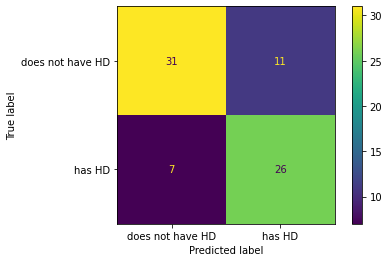

In [ ]:
#plot confusion matrix
plot_confusion_matrix(clf_dt,X_test,y_test,display_labels=['does not have HD','has HD'])

In [ ]:
clf_dt.score(X_test,y_test)

0.76

From the confusion matrix, 

true negative rate is 0.73

true positive rate is 0.78

false positive rate is 0.26

false negative rate is 0.21

Regarding to heart disease, our goal could be to minimize the false negative rate the most, this will be done later. I will prune the tree and improve the total accuracy first

First, let's find all the alphas, then we build one classifier for each alpha, and plot their accuracy on both training data and test data. We should use the alpha that has highest test score on test data


In [82]:
#cost complexity pruning, plot accuracy to different alpha value
path=clf_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path.ccp_alphas#extract all alphas
ccp_alphas=ccp_alphas[:-1]#exclude maximum for alpha

clf_dts=[]
for ccp_alpha in ccp_alphas:
  clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  clf_dt.fit(X_train,y_train)
  clf_dts.append(clf_dt)


In [83]:
#plot accuracy of decision tree as function of alpha
train_scores=[clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,y_test) for clf_dt in clf_dts]


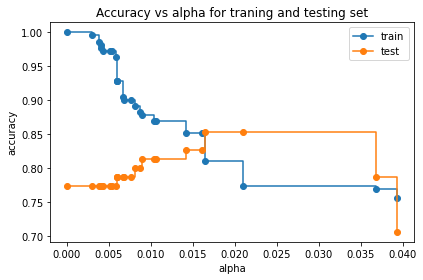

In [84]:
plt.plot(ccp_alphas, train_scores, marker='o',label='train',drawstyle='steps-post')
plt.plot(ccp_alphas, test_scores, marker='o',label='test',drawstyle='steps-post')
plt.title('Accuracy vs alpha for traning and testing set')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
plt.tight_layout()


 when alpha is 0, we have full sized tree, perform good on training but bad on testing; we guess the best alpha could be 0.016. See from plot we have high scores on this alpha when we do 5 fold trees

In [85]:
clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=0.016)
scores=cross_val_score(clf_dt,X_train,y_train,cv=5)



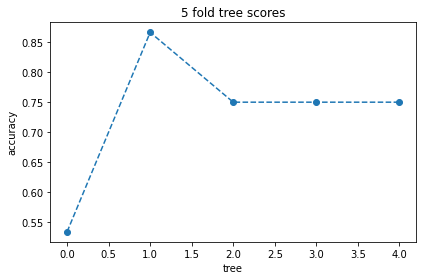

In [86]:
plt.title('5 fold tree scores')
plt.xlabel('tree')
plt.ylabel('accuracy')
plt.tight_layout()
plt.plot(range(5),scores,marker='o',linestyle='--')
#we can see that one alpha would result in wide range of accuracies

Anyway let's use cross validation on all alphas, and record their performance on accuracy. We want mean accuracy to be high, but also standard deviation not too high. we find alpha between 0.014 to 0.015 be better. I will use anyone in this interval to test.

In [87]:
#loop all alpha values, for each alpha,5 fold validation, and store the mean and sd of each loop
means=[]
stds=[]
for alpha in ccp_alphas:
  clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
  scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
  means.append(scores.mean())
  stds.append(scores.std())

print(means)
print(stds)




[0.7025252525252526, 0.7025252525252526, 0.7025252525252526, 0.7025252525252526, 0.7025252525252526, 0.7025252525252526, 0.697979797979798, 0.7025252525252526, 0.7207070707070707, 0.7207070707070707, 0.7207070707070707, 0.7207070707070707, 0.7207070707070707, 0.7207070707070707, 0.7207070707070707, 0.7296969696969697, 0.7341414141414141, 0.7341414141414141, 0.7252525252525253, 0.7297979797979798, 0.7523232323232323, 0.7345454545454546, 0.7345454545454546, 0.7027272727272728, 0.666969696969697, 0.666969696969697]
[0.0953227137312321, 0.0953227137312321, 0.0953227137312321, 0.0953227137312321, 0.0953227137312321, 0.0953227137312321, 0.09673319222750072, 0.10886621079036345, 0.11051954551952638, 0.11051954551952638, 0.11051954551952638, 0.11051954551952638, 0.11051954551952638, 0.11051954551952638, 0.11051954551952638, 0.10551828639819638, 0.09931126971815095, 0.09931126971815095, 0.08124817029953815, 0.08059568045363796, 0.09195614752725496, 0.10943296542188953, 0.10943296542188953, 0.11

<ErrorbarContainer object of 3 artists>

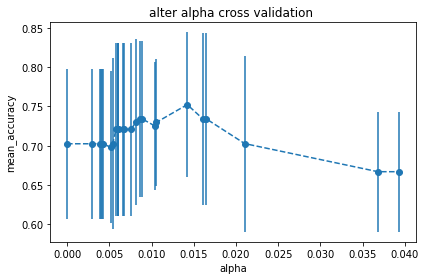

In [88]:
plt.title('alter alpha cross validation ')
plt.xlabel('alpha')
plt.ylabel('mean_accuracy')
plt.tight_layout()
plt.errorbar(ccp_alphas,means,stds,marker='o',linestyle='--')


In [91]:
mask=(ccp_alphas>0.014)&(ccp_alphas<0.015)
best_alpha=float(ccp_alphas[mask])
best_alpha

0.014224751066856332

In [92]:
clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=best_alpha)
clf_dt_pruned=clf_dt_pruned.fit(X_train,y_train)

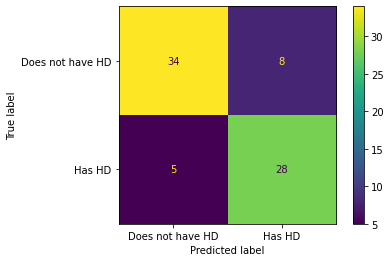

In [93]:
plot_confusion_matrix(clf_dt_pruned,X_test,y_test,display_labels=['Does not have HD','Has HD'])

From the confusion matrix, 

true negative rate is 0.80

true positive rate is 0.84

false positive rate is 0.19

false negative rate is 0.15

We can see total accuracy has been improved on every rate, also the false negative rate; There might be other ways to further improve the false nagative rate because it is the most important in detecting disease. I will explore this later.

In [94]:
clf_dt_pruned.score(X_test,y_test)

0.8266666666666667

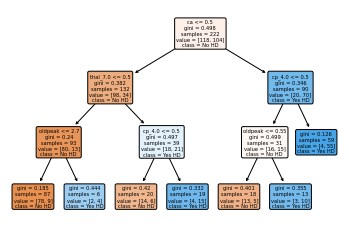

In [95]:
plot_tree(clf_dt_pruned,filled=True, rounded=True, class_names=["No HD","Yes HD"],feature_names=X.columns)
plt.savefig('tree plot')